In [37]:
import pandas as pd
import seaborn as sns

In [14]:
df_routines = pd.read_csv('../data/FICVN-routines.csv')
df_comedians = pd.read_csv('../data/FICVN-comedians.csv')

df_routines['date'] = pd.to_datetime(df_routines['date'])
df_comedians['birth_date'] = pd.to_datetime(df_comedians['birth_date'], format='mixed')

In [10]:
df_routines

,number,year,tv,date,comedian,nationality,video
0,I,1960,NaN,2/21/1960,Carlos Helo,Chile,NaN
1,I,1960,NaN,2/21/1960,Jorge Romero,Chile,NaN
2,I,1960,NaN,2/21/1960,Luis Sandrini,Chile,NaN
3,I,1960,NaN,2/21/1960,Manolo Gonzalez,Chile,NaN
4,II,1961,NaN,2/11/1961,Jorge Romero,Chile,NaN
...,...,...,...,...,...,...,...
195,LXIII,2024,"Canal 13, TVN",2/26/2024,Javiera Contador,Chile,NaN
196,LXIII,2024,"Canal 13, TVN",2/27/2024,Luis Slimming,Chile,NaN
197,LXIII,2024,"Canal 13, TVN",2/28/2024,Lucho Miranda,Chile,NaN
198,LXIII,2024,"Canal 13, TVN",2/29/2024,Sergio Freire,Chile,NaN


In [15]:
df_comedians

,comedian,name,nationality,birth_date,gender
0,Alejandra Azcárate,Alejandra Azcárate,Colombia,1978-03-03,female
1,Alex Ortiz,Alex Ortiz,Chile,1986-09-26,male
2,Alison Mandel,Alison Mandel,Chile,1983-07-05,female
3,Álvaro Salas,Álvaro Salas,Chile,1952-12-27,male
4,"Armando Navarrete ""Mandolino""",Armando Navarrete,Chile,1934-02-28,male
...,...,...,...,...,...
120,Sergio Freire,Sergio Freire,Chile,1980-10-03,male
121,Stefan Kramer,Stefan Kramer,Chile,1982-02-19,male
122,Tato Cifuentes,Héctor Cifuentes,Chile,1925-10-14,male
123,Vanessa Miller,Vanessa Miller,Chile,1965-11-02,female


In [32]:
df = pd.merge(df_routines, df_comedians[['comedian', 'name', 'birth_date', 'gender']], left_on='comedian', right_on='comedian')

In [33]:
df

,number,year,tv,date,comedian,nationality,video,name,birth_date,gender
0,I,1960,NaN,1960-02-21,Carlos Helo,Chile,NaN,Carlos Helo,1929-06-29,male
1,I,1960,NaN,1960-02-21,Jorge Romero,Chile,NaN,Jorge Romero,1929-11-02,male
2,I,1960,NaN,1960-02-21,Luis Sandrini,Chile,NaN,Luis Sandrini,1905-02-22,male
3,I,1960,NaN,1960-02-21,Manolo Gonzalez,Chile,NaN,Manue Carrasco,1918-11-03,male
4,II,1961,NaN,1961-02-11,Jorge Romero,Chile,NaN,Jorge Romero,1929-11-02,male
...,...,...,...,...,...,...,...,...,...,...
220,LXIII,2024,"Canal 13, TVN",2024-02-26,Javiera Contador,Chile,NaN,Javiera Contador,1974-06-17,female
221,LXIII,2024,"Canal 13, TVN",2024-02-27,Luis Slimming,Chile,NaN,Luis Slimming,1987-07-11,male
222,LXIII,2024,"Canal 13, TVN",2024-02-28,Lucho Miranda,Chile,NaN,Lucho Miranda,1995-01-30,male
223,LXIII,2024,"Canal 13, TVN",2024-02-29,Sergio Freire,Chile,NaN,Sergio Freire,1980-10-03,male


In [34]:
df['age'] = round((df['date'] - df['birth_date']).dt.days/365, 0)
df['decade'] = df['date'].dt.year // 10 * 10
df['quinquennial'] = df['date'].dt.year // 5 * 5

<Axes: xlabel='decade', ylabel='age'>

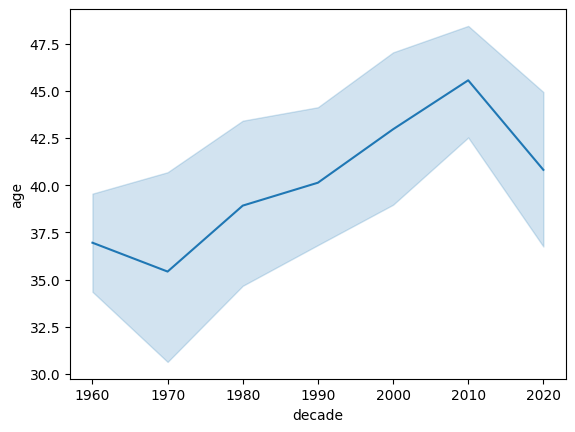

In [65]:
sns.lineplot(data=df, x="decade", y="age")

<Axes: xlabel='quinquennial', ylabel='age'>

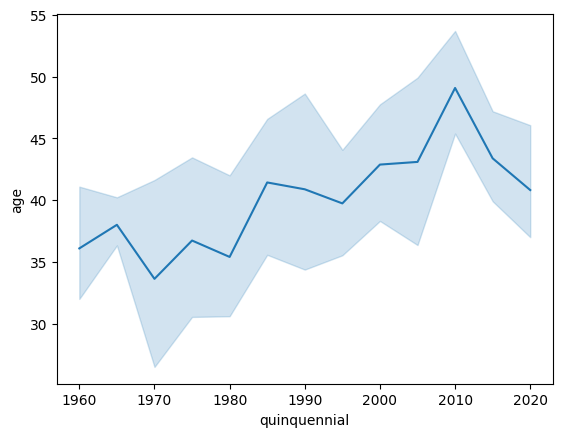

In [45]:
sns.lineplot(data=df, x="quinquennial", y="age")

In [66]:
df_gender = (df[['year', 'gender', 'name']]
                .groupby(['year', 'gender'])
                .agg({'name': pd.Series.nunique})
                .rename(columns={'name': 'count'})
                .reset_index())

In [69]:
df_gender['cumsum'] = df_gender.groupby('gender')['count'].cumsum()

In [70]:
df_gender

,year,gender,count,cumsum
0,1960,male,4,4
1,1961,male,4,8
2,1962,male,1,9
3,1963,male,1,10
4,1964,male,2,12
...,...,...,...,...
75,2020,male,8,193
76,2023,female,3,23
77,2023,male,3,196
78,2024,female,2,25


<Axes: xlabel='year', ylabel='cumsum'>

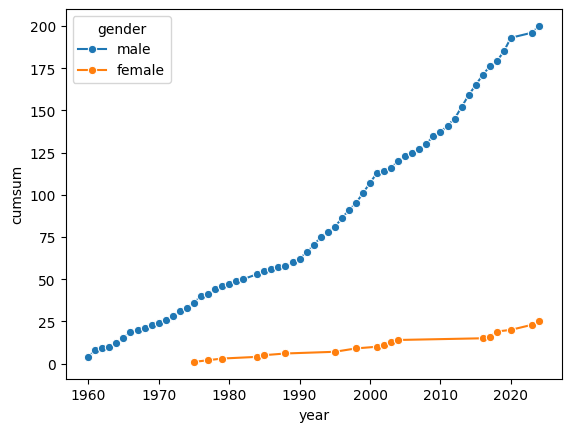

In [71]:
sns.lineplot(data=df_gender, x='year', y='cumsum', hue='gender', marker='o')